In [5]:
#imports
import experiments as exp
experiment_runs = 10000

This part is MLS. It runs the FM local search 10.000 times.

In [6]:
from IPython.display import HTML
import pandas as pd
import time

#Run the multi start local search algorithm 10.000 times. The return value is a list of dictionaries.
#Each dictionary contains the results of one full FM run. 
#Each dictionary contains the following keys:
"""
"fm_runs": number of runs until convergence,
"run_times": a list of the run times of each run,
"total_elapsed": total time elapsed,
"average_elapsed": average time elapsed,
"cut_size": best cut size found,
"partition_1": a list of node ids in partition 1,
"partition_2": a list of node ids in partition 2,
"initial_cut_size": initial cut size
"""
start_time = time.time()
results = exp.run_mls(runs=experiment_runs)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds to run {experiment_runs} experiments")

Elapsed time: 458.80 seconds to run 10000 experiments


In [8]:
summary = exp.summarize_results(results)

# Convert summary to DataFrame for better display
df = pd.DataFrame(list(summary.items()), columns=['Metric', 'Value'])
HTML(df.to_html(index=False))

Metric,Value
Total Runs,10000.000000
Average Runs,501.000000
Average Elapsed (full FM),0.044757
Stdev Elapsed (full FM),0.002826
Total Elapsed,447.565141
Average Cut Size,68.745800
Best Cut Size,29.000000
Worst Cut Size,118.000000
Average Initial Cut Size,642.225300
Best Initial Cut Size,560.000000


This is the section to find an optimum mutation size for the ILS. 
WARNING, it is not parallelized yet, it can take up to 15 hours!

In [10]:
import ils
import time

#Use the bisection search from the previous step to find the best mutation size for the ILS algorithm.
mutation_size_sequence = []
current = 10
lower_bound = current
max = 101
max_iterations = 10000
results = []
best_cut = 501
best_mutation_size = -1
tolerance = 2
n_worse_solutions = 0
step = 10

while current <= max:
    mutation_size_sequence.append(current)
    m_size = current      
    
    #Run the algorithm with the current mutation size 10 times.
    print("Running ILS with mutation size: ", m_size,". Trial: ", len(mutation_size_sequence))  
    start = time.time()
    best, avg_cut_size, results = ils.run_ils(mutation_size=m_size, max_iterations=max_iterations, runs=10)    
    time_elapsed = time.time() - start
    results.append((m_size, results))
    is_better_cut = avg_cut_size < best_cut
    
    if is_better_cut:
        best_cut = avg_cut_size
        best_mutation_size = m_size        
        n_worse_solutions = 0
    else:
        n_worse_solutions += 1 #If tolerance is not exceeded, we will keep exploring.
        
    print("Finished. Cut size: ", avg_cut_size, ". Is better: ", is_better_cut)
    print("Elapsed Time: ", time_elapsed)    
    print("--------------------------------------------")
    
    if n_worse_solutions > tolerance:
        print("Stopping. There is no improvement by incresing mutation size since", tolerance, "trials.")
        break
    
    current += step
    
print("Best mutation size: ", best_mutation_size)
print("Best cut size: ", best_cut)
#Fine tune the mutation size, by running the ILS with mutation size backwards one by one. But only if the best mutation size is greater than 5.
tune_val = best_mutation_size
n_worse_solutions = 0 #reset the counter.
for i in range(2, step+2,2):
    m_size = tune_val - i
    if m_size < 1:
        break    
    
    print("Fine tuning ILS with mutation size: ", m_size,". Trial: ", len(mutation_size_sequence))    
    start = time.time()
    best, avg_cut_size, results = ils.run_ils(mutation_size=m_size, max_iterations=max_iterations, runs=10)    
    time_elapsed = time.time() - start
    results.append((m_size, results))
    is_better_cut = avg_cut_size < best_cut    
    
    if is_better_cut:
        best_cut = avg_cut_size
        best_mutation_size = m_size        
        n_worse_solutions = 0
    else:
        n_worse_solutions += 1 #If tolerance is not exceeded, we will keep exploring.
        
    print("Finished. Cut size: ", avg_cut_size, ". Is better: ", is_better_cut)
    print("Elapsed Time: ", time_elapsed)    
    print("--------------------------------------------")
    
    if n_worse_solutions > tolerance:
        print("Stopping. There is no improvement by increasing mutation size since", tolerance, "trials.")
        break
    

Running ILS with mutation size:  10 . Trial:  1
ILS -0- Mutation Size: 10. Best Cut: 29.
ILS -1- Mutation Size: 10. Best Cut: 23.
ILS -2- Mutation Size: 10. Best Cut: 25.
ILS -3- Mutation Size: 10. Best Cut: 29.
ILS -4- Mutation Size: 10. Best Cut: 30.
ILS -5- Mutation Size: 10. Best Cut: 24.
ILS -6- Mutation Size: 10. Best Cut: 21.
ILS -7- Mutation Size: 10. Best Cut: 21.
ILS -8- Mutation Size: 10. Best Cut: 48.
ILS -9- Mutation Size: 10. Best Cut: 20.
Finished. Cut size:  27 . Is better:  True
Elapsed Time:  8333.888215065002
--------------------------------------------
Running ILS with mutation size:  20 . Trial:  2
ILS -0- Mutation Size: 20. Best Cut: 11.
ILS -1- Mutation Size: 20. Best Cut: 21.
ILS -2- Mutation Size: 20. Best Cut: 35.
ILS -3- Mutation Size: 20. Best Cut: 21.
ILS -4- Mutation Size: 20. Best Cut: 19.
ILS -5- Mutation Size: 20. Best Cut: 31.
ILS -6- Mutation Size: 20. Best Cut: 18.
ILS -7- Mutation Size: 20. Best Cut: 26.
ILS -8- Mutation Size: 20. Best Cut: 20.
ILS 

In [1]:
import mls
best_cut, summary, detailed_results = mls.run_mls(max_iterations=10000,runs=10,graph_file="Graph500.txt")

MLS - 0. Best Cut: 29. Elapsed: 446.283.
MLS - 1. Best Cut: 28. Elapsed: 447.087.
MLS - 2. Best Cut: 23. Elapsed: 447.709.
MLS - 3. Best Cut: 27. Elapsed: 448.844.
MLS - 4. Best Cut: 26. Elapsed: 450.055.
MLS - 5. Best Cut: 32. Elapsed: 448.925.
MLS - 6. Best Cut: 28. Elapsed: 450.549.
MLS - 7. Best Cut: 30. Elapsed: 453.365.
MLS - 8. Best Cut: 27. Elapsed: 451.228.
MLS - 9. Best Cut: 28. Elapsed: 447.345.


TODO: Run GLS here

In [2]:
#TODO: GLS

Gathering results and formatting results for ILS. Load it from the pickle file and format the results.

In [8]:
#MLS 
import utils
from IPython.display import HTML
#import pandas as pd

filename="pckl/2025-03-26_17-46-39_MLS-runs_10-max_iterations_10000-best_cut_27.8-time_439.552.pkl"
#filename="pckl/2025-03-26_13-10-47_MLS-parallel-runs_10-max_iterations_10000-best_cut_28.4-time_635.297.pkl"
results = utils.load_pickle(filename)
#print(results)

df, html_table = utils.convert_results_to_dataframe(results)
HTML(html_table)

Best Cut,Time Elapsed,Avg Cut Size,Avg Initial Cut Size,Avg Time Per FM
29,436.805,68.818,642.331,0.044
28,437.635,69.032,642.210,0.044
23,438.189,68.934,641.996,0.044
27,439.332,68.873,642.480,0.044
26,440.498,68.991,642.463,0.044
32,439.297,69.083,642.229,0.044
28,440.802,68.794,642.427,0.044
30,443.679,68.835,642.428,0.044
27,441.501,69.153,642.266,0.044
28,437.781,69.061,642.074,0.044


Best Cut: Mean = 27.8, Std Dev = 2.394
Time Elapsed: Mean = 439.552


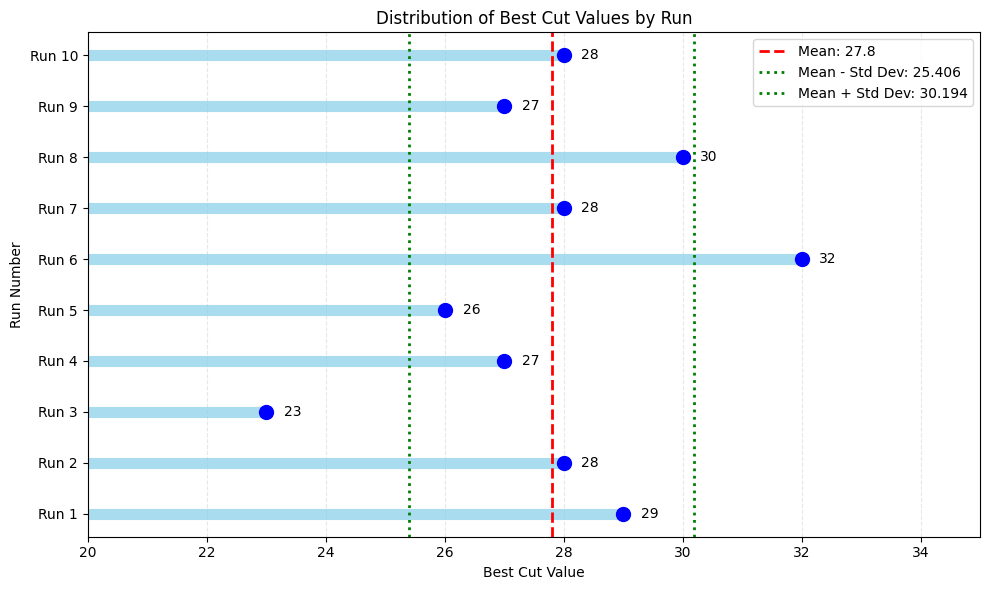

In [9]:
import matplotlib.pyplot as plt

#create stats and plots for MLS.
#LLM Prompt: calculate the mean and stdev of best cut. calculate the mean of time elapsed. round to 3 decimal places.
# Calculate statistics
mean_best_cut = df['Best Cut'].mean().round(3)
std_best_cut = df['Best Cut'].std().round(3)
mean_time_elapsed = df['Time Elapsed'].mean().round(3)

# Print the results
print(f"Best Cut: Mean = {mean_best_cut}, Std Dev = {std_best_cut}")
print(f"Time Elapsed: Mean = {mean_time_elapsed}")

# Create a plot showing the best cut distribution. mark the mean and stdev. Y axis is run number, X axis is best cut value.
# Create a plot with run numbers on y-axis and best cut on x-axis
plt.figure(figsize=(10, 6))

# Plot each run's best cut as a horizontal bar
for i, cut in enumerate(df['Best Cut']):
    plt.hlines(y=i, xmin=20, xmax=cut, color='skyblue', linewidth=8, alpha=0.7)
    plt.scatter(cut, i, color='blue', s=100, zorder=3)
    plt.text(cut+0.3, i, f"{cut}", va='center')

# Add vertical lines for mean and mean±std
plt.axvline(mean_best_cut, color='red', linestyle='dashed', linewidth=2, 
            label=f'Mean: {mean_best_cut}')
plt.axvline(mean_best_cut - std_best_cut, color='green', linestyle='dotted', linewidth=2, 
            label=f'Mean - Std Dev: {(mean_best_cut - std_best_cut):.3f}')
plt.axvline(mean_best_cut + std_best_cut, color='green', linestyle='dotted', linewidth=2, 
            label=f'Mean + Std Dev: {(mean_best_cut + std_best_cut):.3f}')

# Set y-ticks as run numbers (0-9)
plt.yticks(range(len(df)), [f"Run {i+1}" for i in range(len(df))])

# Add labels and title
plt.xlabel('Best Cut Value')
plt.ylabel('Run Number')
plt.title('Distribution of Best Cut Values by Run')
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.legend(loc='upper right')
plt.xlim(20, 35)  # Set reasonable x-axis limits
plt.tight_layout()

ILS Results.

In [10]:
import utils
from IPython.display import HTML

filename="pckl/ils_find_mutation_size/2025-03-26_02-53-50_ILS-mutation_70-runs_10-max_iterations_10000-best_cut_8.8-time_444.173.pkl"
#filename="pckl/ils_find_mutation_size/2025-03-26_01-39-48_ILS-mutation_60-runs_10-max_iterations_10000-best_cut_7.2-time_439.55.pkl"
#filename="pckl/2025-03-27_16-14-30_ILS-parallel-mutation_65-runs_10-max_iterations_10000-best_cut_9.5-time_635.893.pkl"
results = utils.load_pickle(filename)
#print(results)

filename="pckl/ils_find_mutation_size/2025-03-26_01-39-48_ILS-mutation_60-runs_10-max_iterations_10000-best_cut_7.2-time_439.55.pkl"
results_60 = utils.load_pickle(filename)

#columns = ['mutation_size', 'initial_cut', 'best_cut_size', 'time_elapsed', 'avg_cut_size', 'n_stays_in_local_optimum']
columns = ['best_cut_size', 'time_elapsed', 'n_stays_in_local_optimum']
df, html_table = utils.convert_results_to_dataframe(results, columns=columns)
df_60, html_table_60 = utils.convert_results_to_dataframe(results_60, columns=columns)
HTML(html_table)

Best Cut,Time Elapsed,Stucks in Local Optimum
2,446.810,17
9,437.065,20
9,445.580,12
8,442.682,10
9,446.642,33
9,442.561,13
12,445.427,9
6,444.544,16
12,446.317,12
12,444.104,17


Generate ILS statistics. Load the .pkl files